In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import PercentFormatter

# <span style= "background:yellow">Auditory training_outliers removed

In [5]:
auddf=pd.read_csv('../auditory_training/results/AudPreprocessed_NoOutliers_PrePostAdded.csv')
print(auddf.head())
auddf[['subject','task','date']]=auddf['Name'].str.split('_',expand=True)
df_aud=pd.DataFrame()
for i in auddf['subject'].unique():
    newdf=auddf[auddf['subject']==i].reset_index(drop=True)
    newdf.rename(columns={'AudReg':i},inplace=True)
    df_aud=pd.concat([df_aud,newdf],axis=1)
df_aud['Session']=['Pre-test']+['Session_'+str(i) for i in range(1,11)]+['Post-test']
df_aud=df_aud.drop(columns=['date','Name'])
df_aud.head(10)

                           Name  AudReg
0  train10_audtrain2_2023-11-09    0.83
1  train10_audtrain2_2023-11-10    0.97
2  train10_audtrain2_2023-11-11    0.97
3  train10_audtrain2_2023-11-13    0.86
4  train10_audtrain2_2023-11-14    0.97


,train10,subject,task,train20,subject,task,train23,subject,task,train34,...,train74,subject,task,train79,subject,task,train81,subject,task,Session
0,0.83,train10,audtrain2,0.63,train20,audtrain2,0.88,train23,audtrain1,0.88,...,0.67,train74,audtrain2,0.38,train79,audtrain1,0.92,train81,audtrain1,Pre-test
1,0.97,train10,audtrain2,0.64,train20,audtrain2,0.83,train23,audtrian1,0.81,...,0.58,train74,audtrain2,0.69,train79,audtrain1,0.78,train81,audtrain1,Session_1
2,0.97,train10,audtrain2,0.56,train20,audtrain2,0.89,train23,audtrian1,0.94,...,0.75,train74,audtrain2,0.64,train79,audtrain1,0.81,train81,audtrain1,Session_2
3,0.86,train10,audtrain2,0.78,train20,audtrain2,0.92,train23,audtrian1,0.89,...,0.58,train74,audtrain2,0.69,train79,audtrain1,0.50,train81,audtrain1,Session_3
4,0.97,train10,audtrain2,0.81,train20,audtrain2,0.86,train23,audtrian1,0.94,...,0.86,train74,audtrain2,0.75,train79,audtrain1,0.86,train81,audtrain1,Session_4
5,0.94,train10,audtrain2,0.58,train20,audtrain2,0.94,train23,audtrian1,0.97,...,0.64,train74,audtrain2,0.64,train79,audtrain1,0.92,train81,audtrain1,Session_5
6,0.89,train10,audtrain2,0.69,train20,audtrain2,0.94,train23,audtrian1,0.22,...,0.81,train74,audtrain2,0.72,train79,audtrain1,0.92,train81,audtrain1,Session_6
7,0.92,train10,audtrain2,0.56,train20,audtrain2,0.94,train23,audtrian1,0.92,...,0.86,train74,audtrain2,0.50,train79,audtrain1,0.92,train81,audtrain1,Session_7
8,0.94,train10,audtrain2,0.78,train20,audtrain2,0.89,train23,audtrian1,0.89,...,0.72,train74,audtrain2,0.50,train79,audtrain1,0.86,train81,audtrain1,Session_8
9,1.00,train10,audtrain2,0.53,train20,audtrain2,0.89,train23,audtrian1,0.92,...,0.61,train74,audtrain2,0.44,train79,audtrain1,0.64,train81,audtrain1,Session_9


In [6]:
from scipy.stats import ttest_rel

pretest=df_aud.iloc[0, :-2:3]
posttest=df_aud.iloc[-1,:-2:3]
print(posttest.mean())
t_statistic, p_value = ttest_rel(pretest, posttest)

# Print the results
print("t-statistic:", t_statistic.round(2))
print("p-value:", p_value.round(2))

0.7285
t-statistic: -2.67
p-value: 0.02


In [7]:
print(pretest,'\n', posttest)

train10    0.83
train20    0.63
train23    0.88
train34    0.88
train37    0.67
train39    0.63
train3     0.54
train42    0.42
train46    0.46
train50     0.5
train53    0.63
train56    0.46
train60    0.79
train62    0.75
train64    0.67
train69    0.58
train72    0.71
train74    0.67
train79    0.38
train81    0.92
Name: 0, dtype: object 
 train10    0.96
train20    0.54
train23    0.96
train34     1.0
train37    0.79
train39    0.71
train3     0.54
train42    0.63
train46    0.33
train50    0.63
train53    0.63
train56    0.54
train60    0.92
train62     1.0
train64     0.5
train69    0.96
train72    0.67
train74    0.88
train79    0.42
train81    0.96
Name: 11, dtype: object


In [8]:
session1=df_aud.iloc[1, :-2:3]
session10=df_aud.iloc[-2,:-2:3]

t_statistic, p_value = ttest_rel(session1, session10)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -1.4642140927962186
p-value: 0.15948552756844236


In [9]:
aud_lists=auddf['subject'].unique()

In [10]:
df_aud['aud_mean'] = df_aud[aud_lists].mean(axis=1)
df_aud['aud_std'] = df_aud[aud_lists].std(axis=1)
df_aud['aud_SE'] = df_aud[aud_lists].sem(axis=1)

In [11]:
df_aud['aud_mean']

0     0.6500
1     0.6520
2     0.6950
3     0.6430
4     0.7555
5     0.7060
6     0.6965
7     0.7210
8     0.7080
9     0.7105
10    0.7015
11    0.7285
Name: aud_mean, dtype: float64

In [12]:
df_aud['aud_SE']

0     0.035696
1     0.039321
2     0.042361
3     0.039637
4     0.035751
5     0.041310
6     0.046523
7     0.043304
8     0.044061
9     0.045058
10    0.040842
11    0.047872
Name: aud_SE, dtype: float64

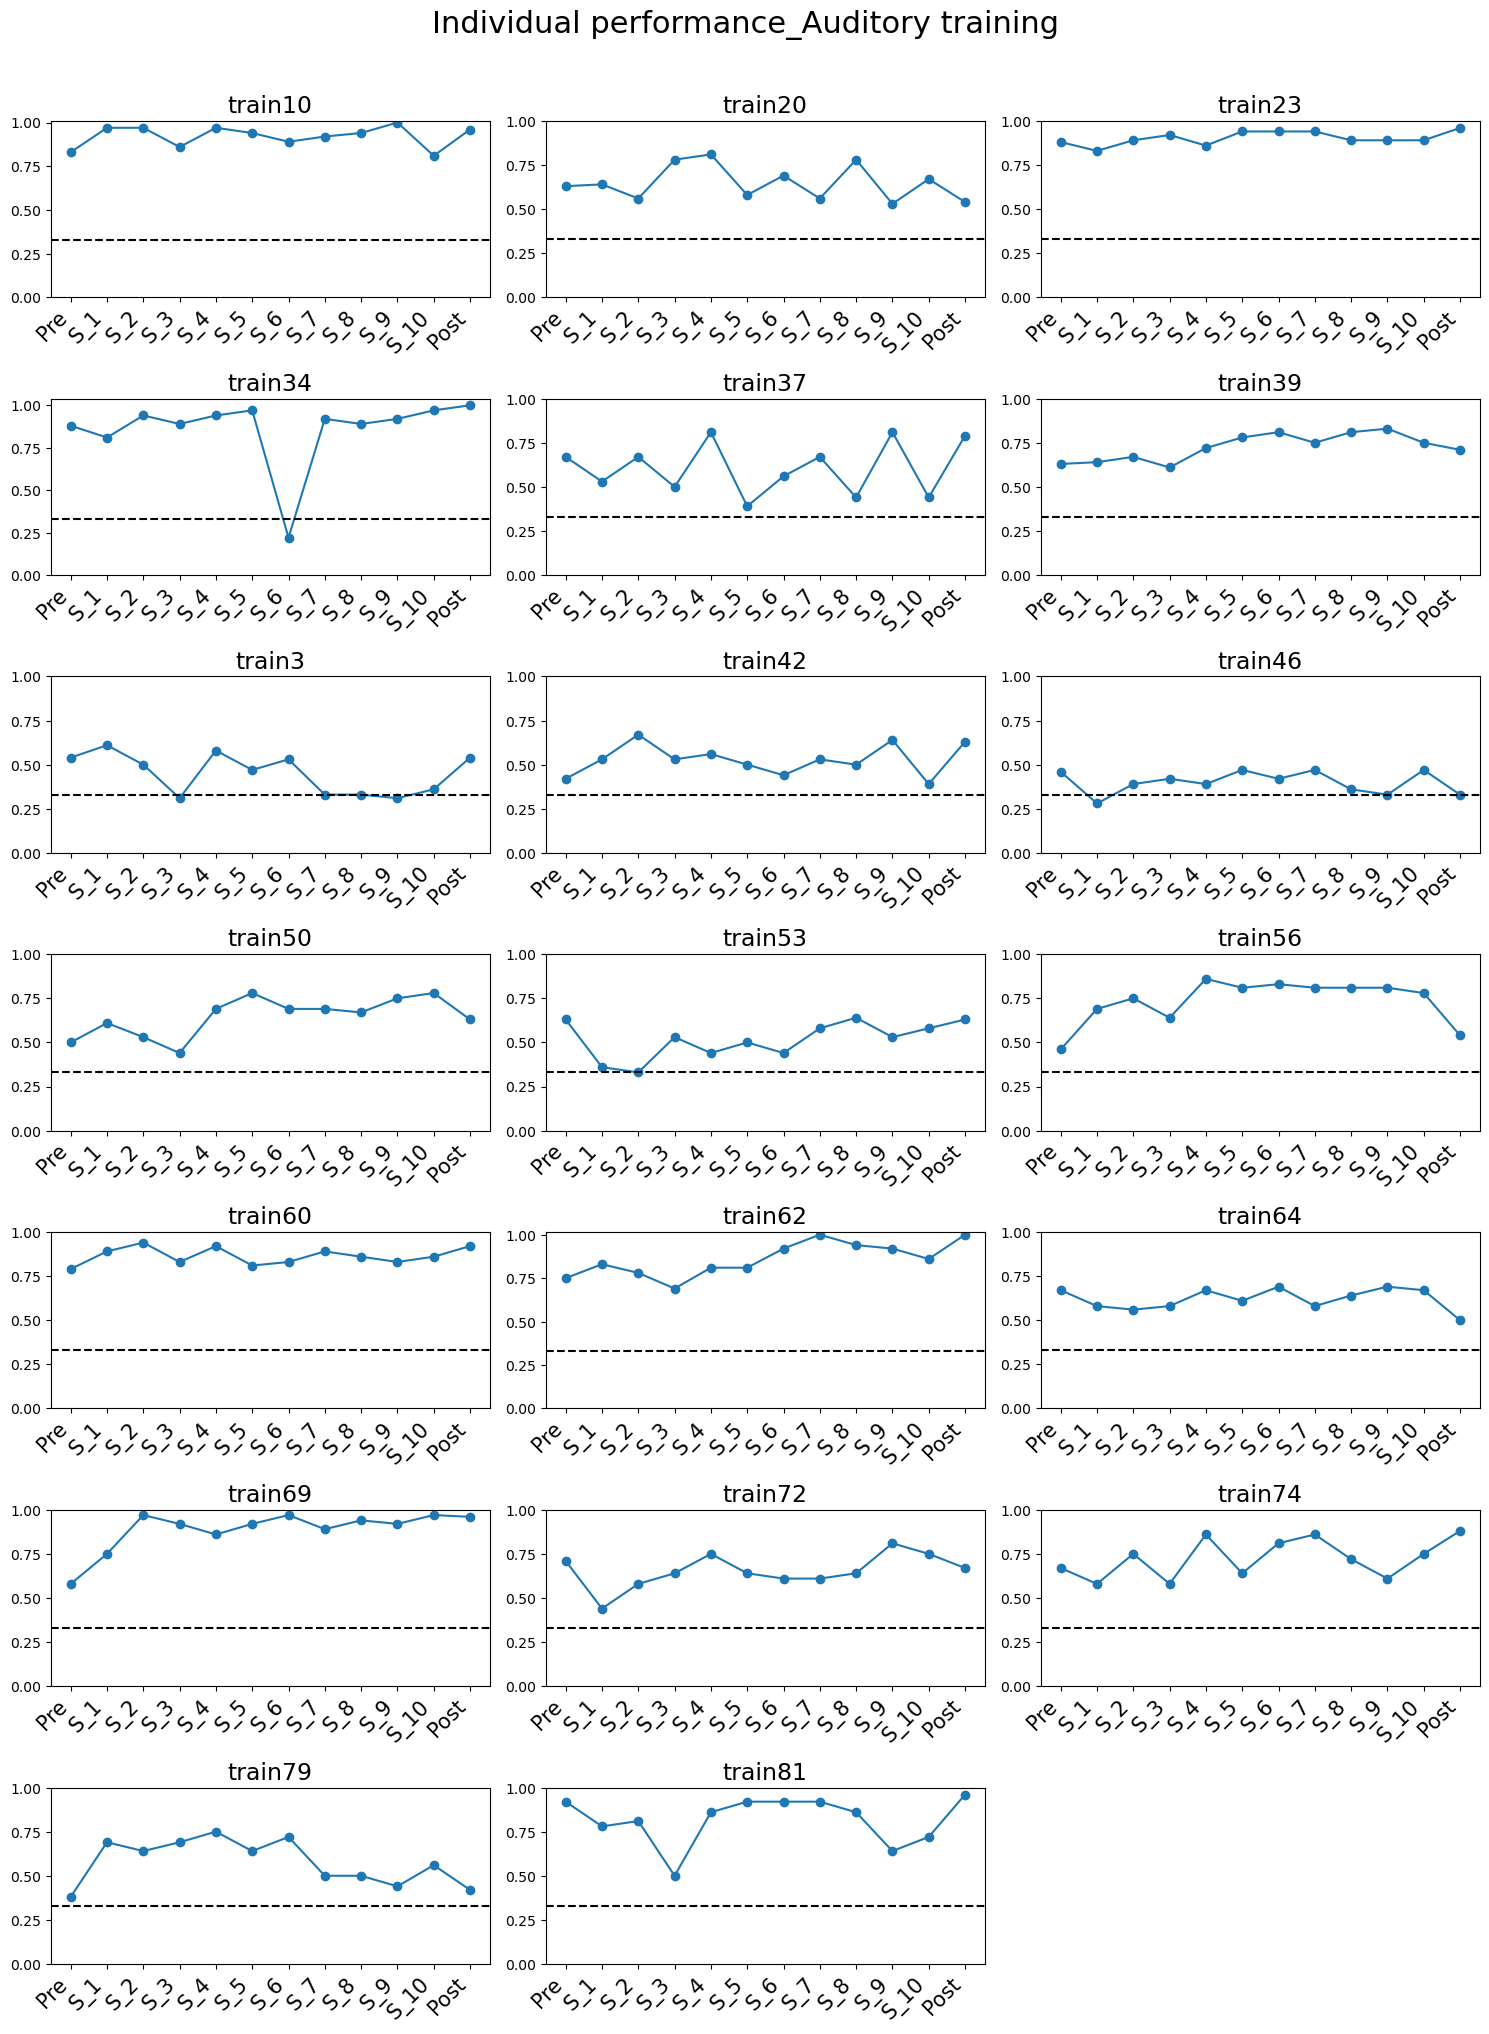

In [13]:
fig, axes = plt.subplots(ncols=3, nrows=9, figsize=(15, 25))
ses=['Pre']+['S_'+str(i)for i in range(1,11)]+['Post']
# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

for i, ax in zip(aud_lists, axes):
    ax.plot(ses, df_aud[i],marker='o')
    ax.set_title(i,size=17)  # Set the title for each subplot
    ax.set_xticks(ses)
    ax.set_xticklabels(ses,size=15, rotation=45, ha='right')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.axhline(0.33,linestyle='--',color='k')
    
# Hide any empty subplots
for i in range(len(aud_lists), len(axes)):
    fig.delaxes(axes[i])
fig.suptitle('Individual performance_Auditory training',y=1.01,size=22)
plt.tight_layout()
plt.show()

# <span style= "background:yellow">Visual training_outliers removed

In [14]:
visdf=pd.read_csv('../visual_training/results/VisPreprocessed_NoOutliers_PrePostAdded.csv')
visdf[['subject','task','date']]=visdf['Name'].str.split('_',expand=True)
df_vis=pd.DataFrame()
for i in visdf['subject'].unique():
    newdf=visdf[visdf['subject']==i].reset_index(drop=True)
    newdf.rename(columns={'VisReg':i},inplace=True)
    df_vis=pd.concat([df_vis,newdf],axis=1)
df_vis['Session']=['Pre']+[str(i) for i in range(1,11)]+['Post']
df_vis=df_vis.drop(columns=['date','Name'])
df_vis.head(3)

,train11,subject,task,train16,subject,task,train19,subject,task,train21,...,train71,subject,task,train7,subject,task,train80,subject,task,Session
0,0.29,train11,vistrain2,0.42,train16,vistrain2,0.33,train19,vistrain1,0.33,...,0.63,train71,vistrain1,0.38,train7,vistrain1,0.50,train80,vistrain2,Pre
1,0.33,train11,vistrain2,0.44,train16,vistrain2,0.44,train19,vistrain1,0.47,...,0.56,train71,vistrain1,0.28,train7,vistrain1,0.39,train80,vistrain2,1
2,0.31,train11,vistrain2,0.42,train16,vistrain2,0.39,train19,vistrain1,0.61,...,0.31,train71,vistrain1,0.44,train7,vistrain1,0.33,train80,vistrain2,2


In [15]:
pretest=df_vis.iloc[0, :-2:3]
posttest=df_vis.iloc[-1,:-2:3]
print(posttest.mean())
t_statistic, p_value = ttest_rel(pretest, posttest)

# Print the results
print("t-statistic:", t_statistic.round(2))
print("p-value:", p_value.round(4))

0.6054166666666668
t-statistic: -3.96
p-value: 0.0006


In [16]:
session1=df_vis.iloc[1, :-2:3]
session10=df_vis.iloc[-2,:-2:3]

t_statistic, p_value = ttest_rel(session1, session10)

# Print the results
print("t-statistic:", t_statistic.round(2))
print("p-value:", p_value.round(2))

t-statistic: -1.66
p-value: 0.11


In [17]:
vis_lists=visdf['subject'].unique()

In [18]:
df_vis['vis_mean'] = df_vis[vis_lists].mean(axis=1)
df_vis['vis_std'] = df_vis[vis_lists].std(axis=1)
df_vis['vis_SE'] = df_vis[vis_lists].sem(axis=1)

In [19]:
df_vis['vis_std']

0     0.131710
1     0.127143
2     0.145779
3     0.192512
4     0.198636
5     0.188580
6     0.180999
7     0.206723
8     0.208174
9     0.206180
10    0.208132
11    0.176068
Name: vis_std, dtype: float64

In [20]:
df_vis.head()

,train11,subject,task,train16,subject,task,train19,subject,task,train21,...,train7,subject,task,train80,subject,task,Session,vis_mean,vis_std,vis_SE
0,0.29,train11,vistrain2,0.42,train16,vistrain2,0.33,train19,vistrain1,0.33,...,0.38,train7,vistrain1,0.50,train80,vistrain2,Pre,0.485417,0.131710,0.026885
1,0.33,train11,vistrain2,0.44,train16,vistrain2,0.44,train19,vistrain1,0.47,...,0.28,train7,vistrain1,0.39,train80,vistrain2,1,0.485000,0.127143,0.025953
2,0.31,train11,vistrain2,0.42,train16,vistrain2,0.39,train19,vistrain1,0.61,...,0.44,train7,vistrain1,0.33,train80,vistrain2,2,0.485833,0.145779,0.029757
3,0.28,train11,vistrain2,0.50,train16,vistrain2,0.36,train19,vistrain1,0.39,...,0.19,train7,vistrain1,0.25,train80,vistrain2,3,0.512083,0.192512,0.039296
4,0.39,train11,vistrain2,0.36,train16,vistrain2,0.22,train19,vistrain1,0.31,...,0.14,train7,vistrain1,0.39,train80,vistrain2,4,0.482917,0.198636,0.040546


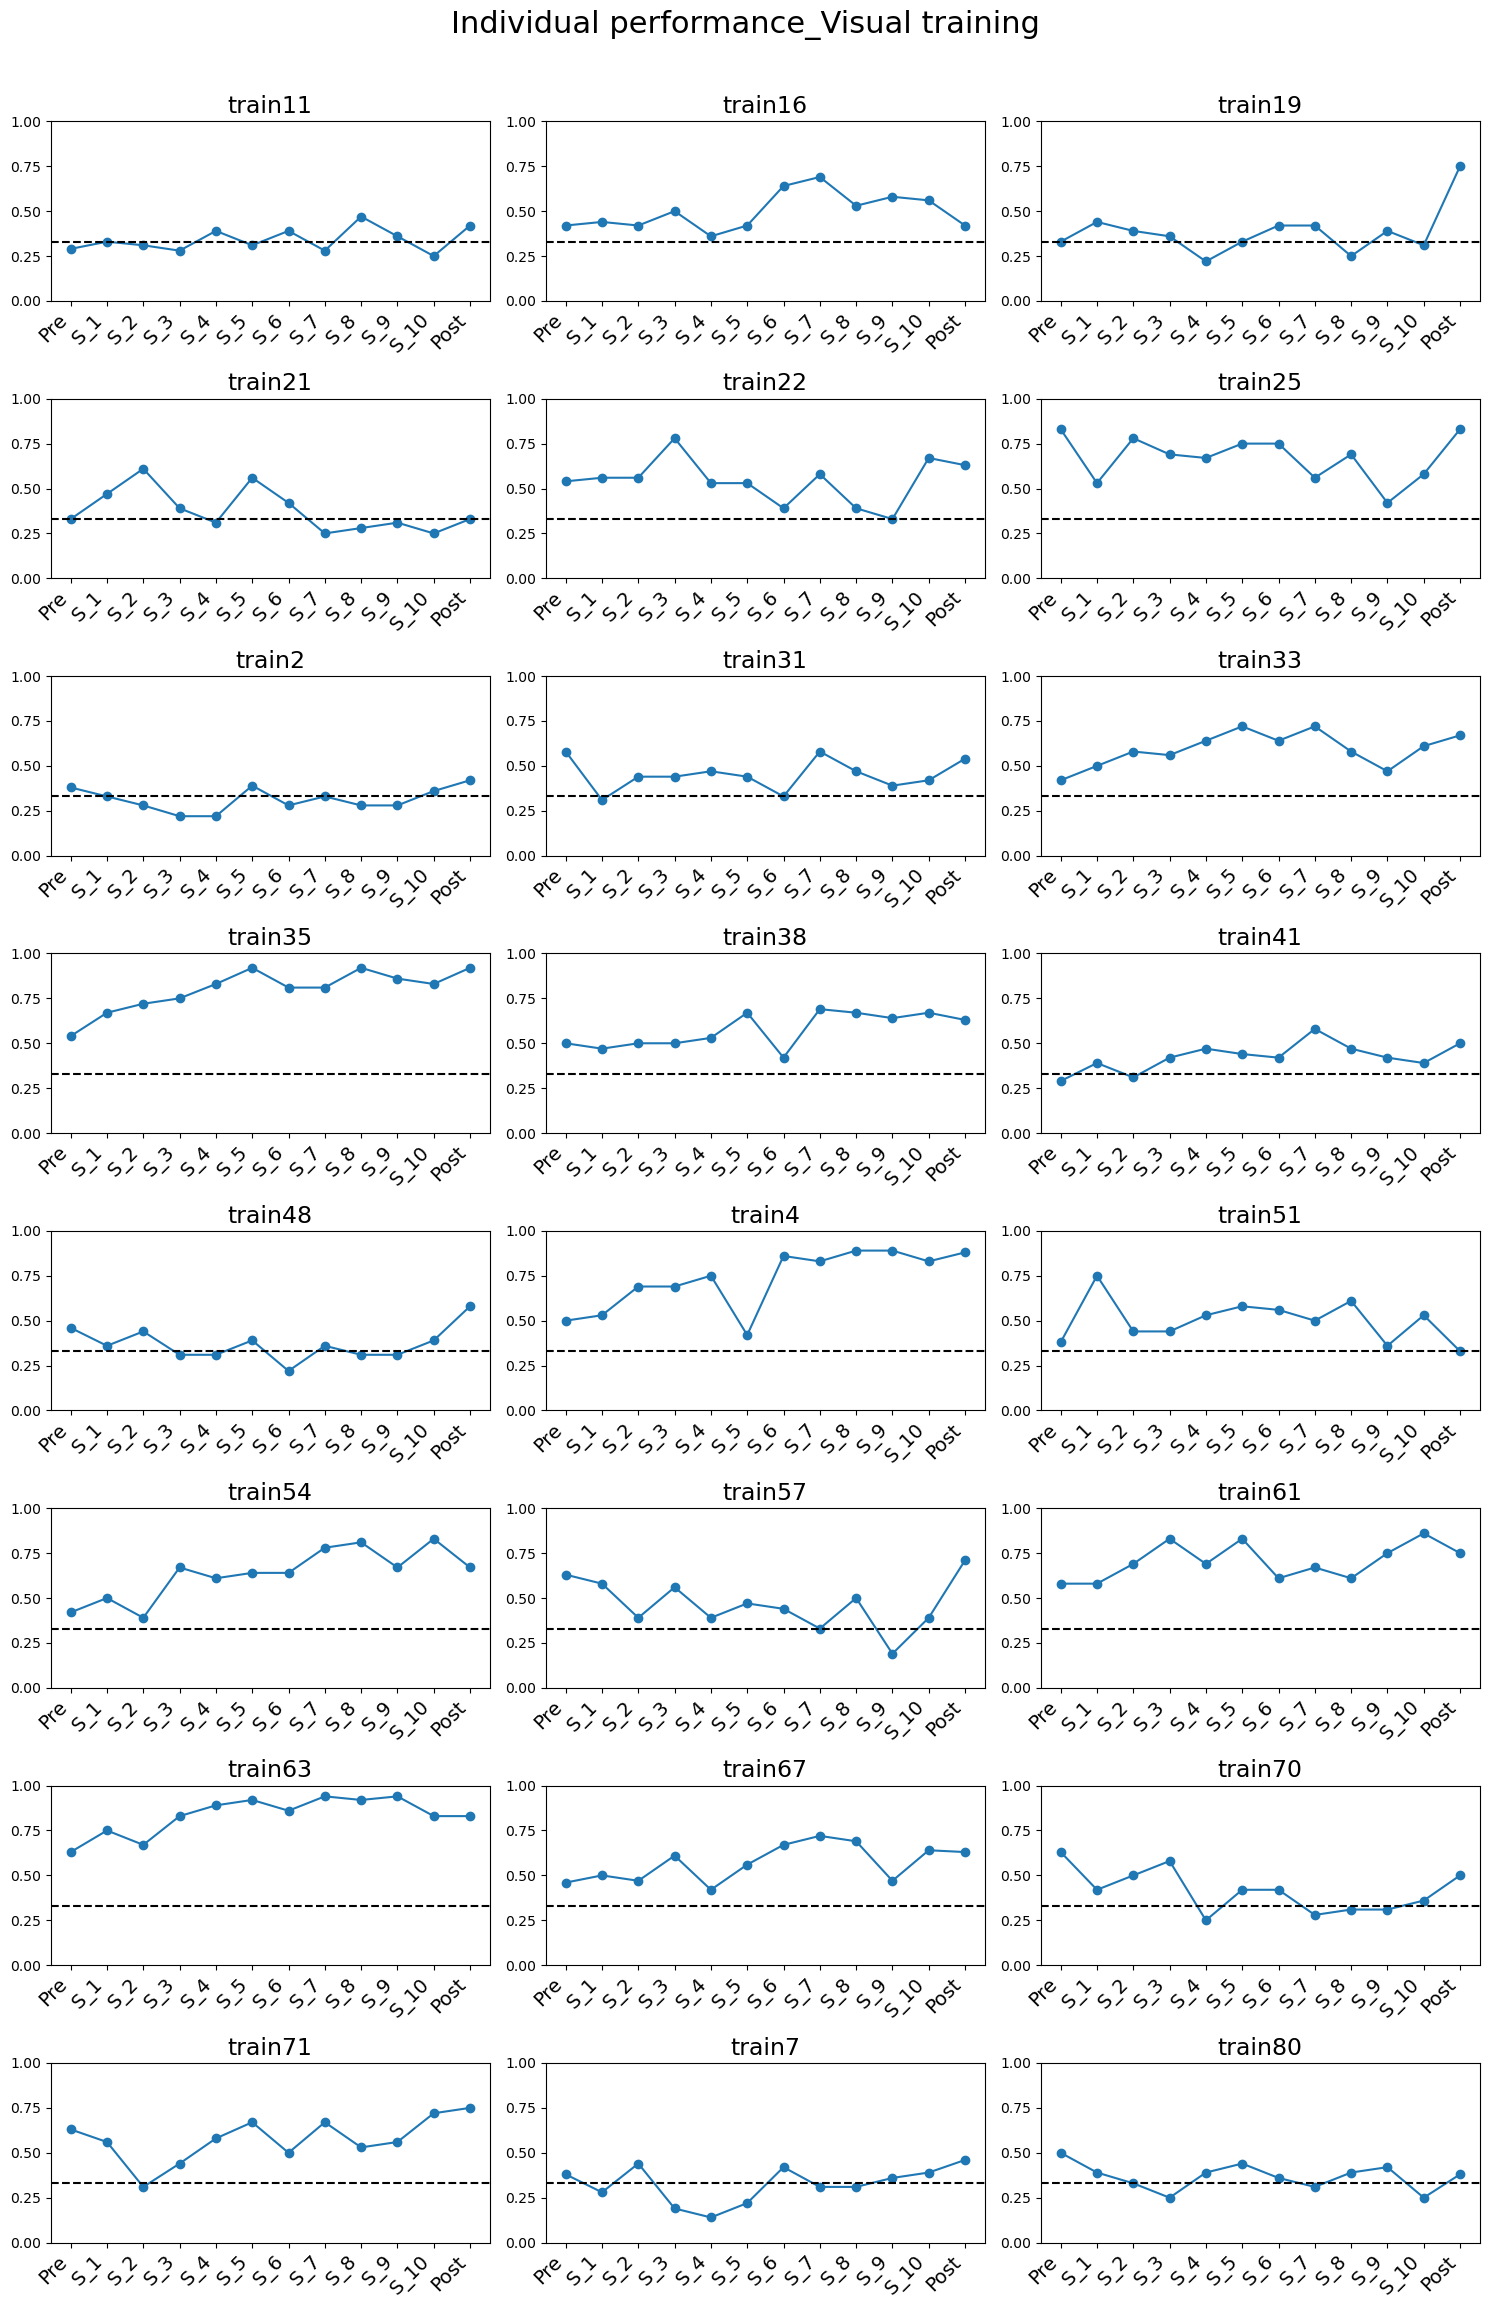

In [21]:
fig, axes = plt.subplots(ncols=3, nrows=9, figsize=(15, 25))
ses=['Pre']+['S_'+str(i)for i in range(1,11)]+['Post']
# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

for i, ax in zip(vis_lists, axes):
    ax.plot(ses, df_vis[i],marker='o')
    ax.set_title(i,size=17)  # Set the title for each subplot
    ax.set_xticks(ses)
    ax.set_xticklabels(ses,size=14, rotation=45, ha='right')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.axhline(0.33,linestyle='--',color='k')
    
# Hide any empty subplots
for i in range(len(vis_lists), len(axes)):
    fig.delaxes(axes[i])
fig.suptitle('Individual performance_Visual training',y=1.01,size=22)
plt.tight_layout()
plt.show()


In [22]:
df_vis['aud_mean']=df_aud['aud_mean']
df_vis['aud_std']=df_aud['aud_std']
df_vis['aud_SE']=df_aud['aud_SE']
df_vis.head(3)

,train11,subject,task,train16,subject,task,train19,subject,task,train21,...,train80,subject,task,Session,vis_mean,vis_std,vis_SE,aud_mean,aud_std,aud_SE
0,0.29,train11,vistrain2,0.42,train16,vistrain2,0.33,train19,vistrain1,0.33,...,0.50,train80,vistrain2,Pre,0.485417,0.131710,0.026885,0.650,0.159638,0.035696
1,0.33,train11,vistrain2,0.44,train16,vistrain2,0.44,train19,vistrain1,0.47,...,0.39,train80,vistrain2,1,0.485000,0.127143,0.025953,0.652,0.175847,0.039321
2,0.31,train11,vistrain2,0.42,train16,vistrain2,0.39,train19,vistrain1,0.61,...,0.33,train80,vistrain2,2,0.485833,0.145779,0.029757,0.695,0.189445,0.042361


In [23]:
df_vis[['vis_SE','aud_SE']]

,vis_SE,aud_SE
0,0.026885,0.035696
1,0.025953,0.039321
2,0.029757,0.042361
3,0.039296,0.039637
4,0.040546,0.035751
5,0.038494,0.041310
6,0.036946,0.046523
7,0.042197,0.043304
8,0.042493,0.044061
9,0.042086,0.045058


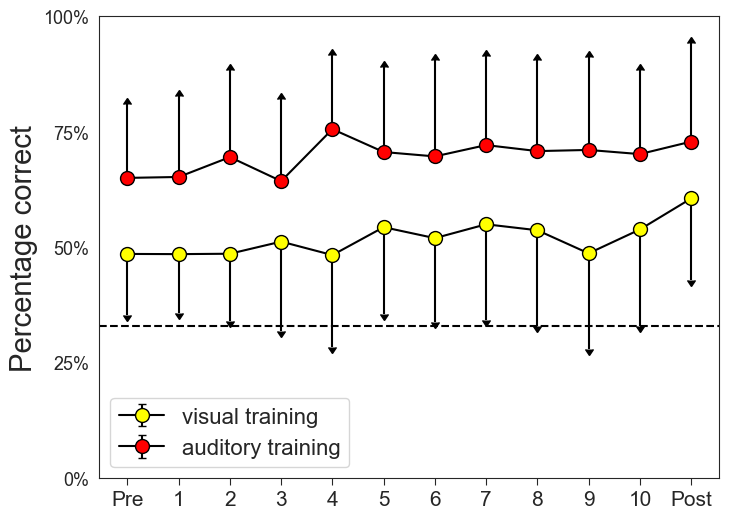

In [24]:
sns.set_style('white')
plt.figure(figsize=(8, 6))

# Plotting visual training with error bars
plt.errorbar(df_vis['Session'], df_vis['vis_mean'], yerr=df_vis['vis_std'], 
             fmt='o-', color='k', markersize=10, markeredgewidth=1, 
             markerfacecolor='yellow', markeredgecolor='k', uplims=True)

# rects1 = ax.bar(ind, men_means, width, color='r')
# plotline1, caplines1, barlinecols1 = ax.errorbar(
#         ind, men_means, yerr=men_std, lolims=True,
#         capsize = 0, ls='None', color='k')

# Plotting auditory training
plt.errorbar(df_vis['Session'], df_vis['aud_mean'],yerr=df_vis['aud_std'], 
             fmt='o-', color='k', markersize=10, markeredgewidth=1, 
             markerfacecolor='red', markeredgecolor='k', lolims=True)


x_positions = range(len(df_vis['Session']))
x_labels = df_vis['Session']
plt.xticks(x_positions, x_labels,fontsize=15)

plt.legend(['visual training', 'auditory training'], fontsize=16)
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0.0', '0.25', '0.5', '0.75', '1.0'])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
plt.yticks(fontsize=13)
# plt.xticks(rotation=45, fontsize=15)
plt.tick_params(axis='x', which='both', bottom=True, top=False, length=5)  # Ensure tick lines are shown on the bottom
plt.axhline(y=0.33, color='k', linestyle='--', alpha=1)

# plt.xlabel('Session', size=20)
plt.ylabel('Percentage correct', size=21)
plt.show()

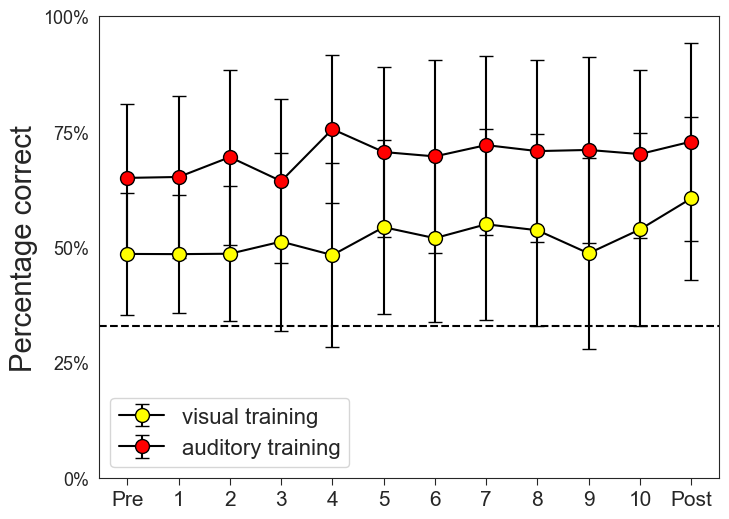

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Assuming df_vis is a DataFrame with the required data
# sns.set_style('white')
plt.figure(figsize=(8, 6))

# Plotting visual training with error bars
plt.errorbar(df_vis['Session'], df_vis['vis_mean'], yerr=df_vis['vis_std'], 
             fmt='o-', color='k', markersize=10, markeredgewidth=1, 
             markerfacecolor='yellow', markeredgecolor='k', capsize=5)

# Plotting auditory training with error bars
plt.errorbar(df_vis['Session'], df_vis['aud_mean'], yerr=df_vis['aud_std'], 
             fmt='o-', color='k', markersize=10, markeredgewidth=1, 
             markerfacecolor='red', markeredgecolor='k', capsize=5)

x_positions = range(len(df_vis['Session']))
x_labels = df_vis['Session']
plt.xticks(x_positions, x_labels, fontsize=15)

plt.legend(['visual training', 'auditory training'], fontsize=16)
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0.0', '0.25', '0.5', '0.75', '1.0'])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
plt.yticks(fontsize=13)
plt.tick_params(axis='x', which='both', bottom=True, top=False, length=5)  # Ensure tick lines are shown on the bottom
plt.axhline(y=0.33, color='k', linestyle='--', alpha=1)

plt.ylabel('Percentage correct', size=21)
plt.show()


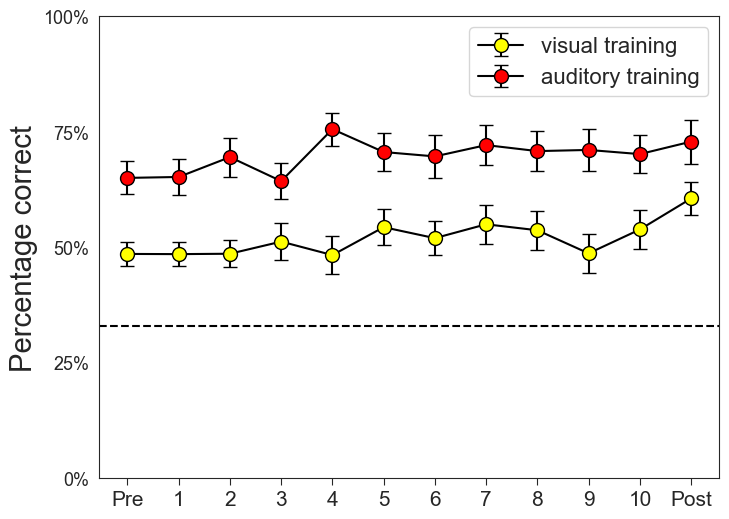

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Assuming df_vis is a DataFrame with the required data
# sns.set_style('white')
plt.figure(figsize=(8, 6))

# Plotting visual training with error bars
plt.errorbar(df_vis['Session'], df_vis['vis_mean'], yerr=df_vis['vis_SE'], 
             fmt='o-', color='k', markersize=10, markeredgewidth=1, 
             markerfacecolor='yellow', markeredgecolor='k', capsize=5)

# Plotting auditory training with error bars
plt.errorbar(df_vis['Session'], df_vis['aud_mean'], yerr=df_vis['aud_SE'], 
             fmt='o-', color='k', markersize=10, markeredgewidth=1, 
             markerfacecolor='red', markeredgecolor='k', capsize=5)

x_positions = range(len(df_vis['Session']))
x_labels = df_vis['Session']
plt.xticks(x_positions, x_labels, fontsize=15)

plt.legend(['visual training', 'auditory training'], fontsize=16)
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0.0', '0.25', '0.5', '0.75', '1.0'])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
plt.yticks(fontsize=13)
plt.tick_params(axis='x', which='both', bottom=True, top=False, length=5)  # Ensure tick lines are shown on the bottom
plt.axhline(y=0.33, color='k', linestyle='--', alpha=1)

plt.ylabel('Percentage correct', size=21)
plt.savefig(f'../plots/training_timeline.png', bbox_inches='tight', dpi=250)
plt.show()
